
# Walmart Sales Analysis


In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Import dataset from kaggle https://www.kaggle.com/datasets/asahu40/walmart-data-analysis-and-forcasting

df = pd.read_csv('dataset/Walmart.csv')

### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Change the type of column 'Date' to datetime

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [5]:
# Check if there is any null values

df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

*No null values among all columns.*

In [6]:
# Check if there is duplicated values

df.duplicated().sum()

0

*No duplicated values in the dataframe.*

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
# Change 'Temperature' from Fahrenheit to Celsius

df['Temperature'] = (df['Temperature'] - 32) * 5 / 9

In [9]:
# Add new columns 'Year' and 'Month' from 'Date'

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [10]:
# Check the first 5 rows of our revised dataset

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,2010,3


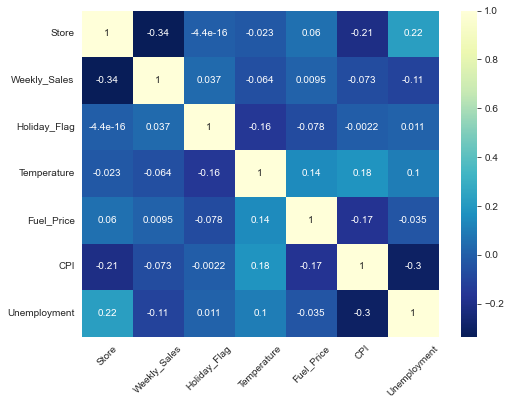

In [11]:
# Correlation Analysis

sns.set_style('dark')
plt.figure(figsize=(8,6))
subset = df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
sns.heatmap(subset.corr(), annot=True, cmap='YlGnBu_r') 
plt.xticks(rotation=45)
plt.show()

In [12]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Year               3
Month             12
dtype: int64

*Data contains 45 stores sales records in 3 years.*

In [13]:
# Find the top 5 stores with highest total sales in 3 years

df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head()

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

In [14]:
# Find the top 5 stores with highest average weekly sales 

df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).head()

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
Name: Weekly_Sales, dtype: float64

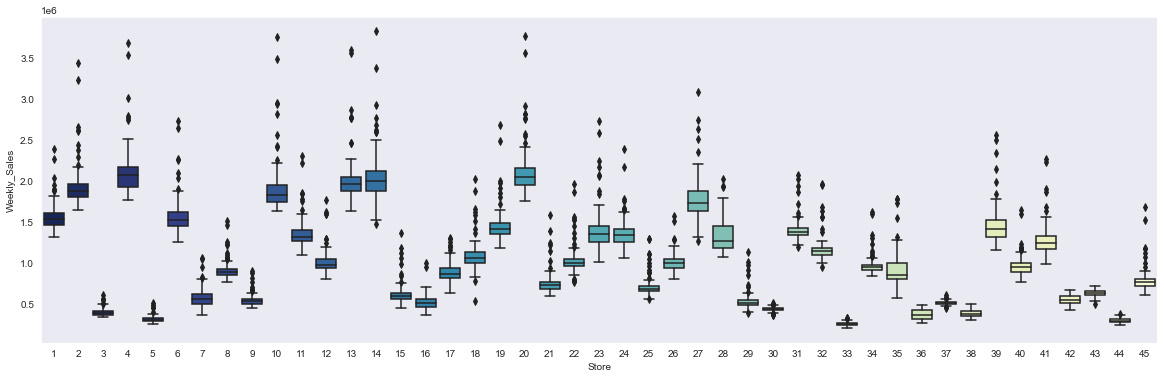

In [15]:
# Plot the sales distribution of each store

plt.figure(figsize=(20,6))
sns.boxplot(data=df, x='Store', y='Weekly_Sales', palette='YlGnBu_r')
plt.show()

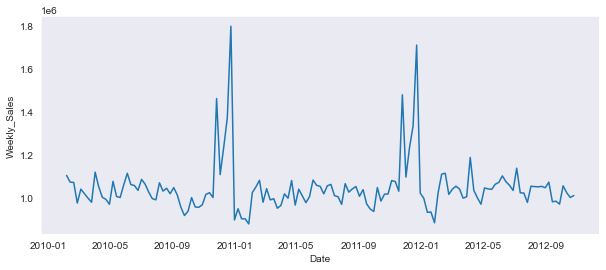

In [16]:
# Show the trend of sales by dates

plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Date', y='Weekly_Sales', ci=None, palette='YlGnBu_r')
plt.show()

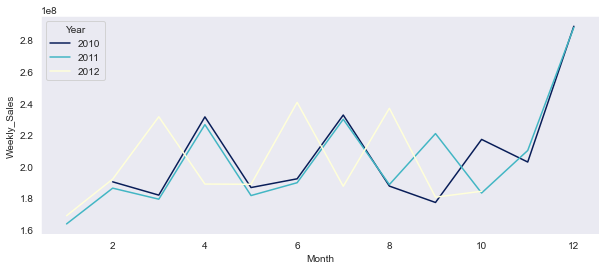

In [17]:
# Show the trend of sales by months

plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Month', y='Weekly_Sales', estimator='sum', hue='Year', ci=None, palette='YlGnBu_r')
plt.show()

*Spikes have been observed in the end of the year.*

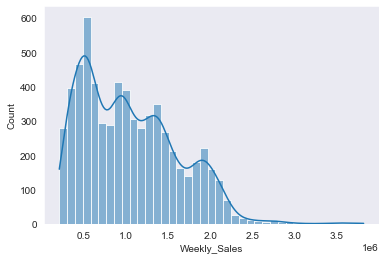

In [18]:
# The distribution of Weekly_Sales

sns.histplot(data=df, x='Weekly_Sales', kde=True, palette='YlGnBu_r')
plt.show()

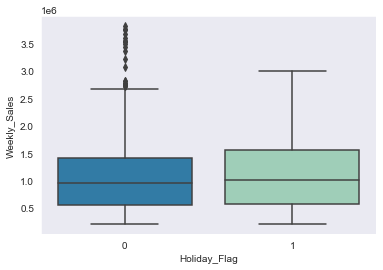

In [19]:
# Find out if holiday makes any difference in sales

sns.boxplot(data=df, x='Holiday_Flag', y='Weekly_Sales', palette='YlGnBu_r')
plt.show()

In [20]:
# Use t-test to examine if holiday sales is significantly different from non-holiday sales

holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

stats.ttest_ind(holiday_sales, non_holiday_sales)

Ttest_indResult(statistic=2.9608919093259036, pvalue=0.003078699263818616)

*With a confidence level of 95%, the holiday sales are significantly different from the non-holiday sales since the p-value is less than 0.05.*

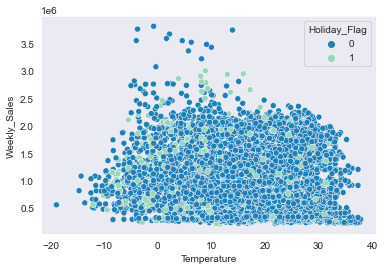

In [21]:
# The relation between sales and temperature

sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Holiday_Flag', palette='YlGnBu_r')
plt.show()

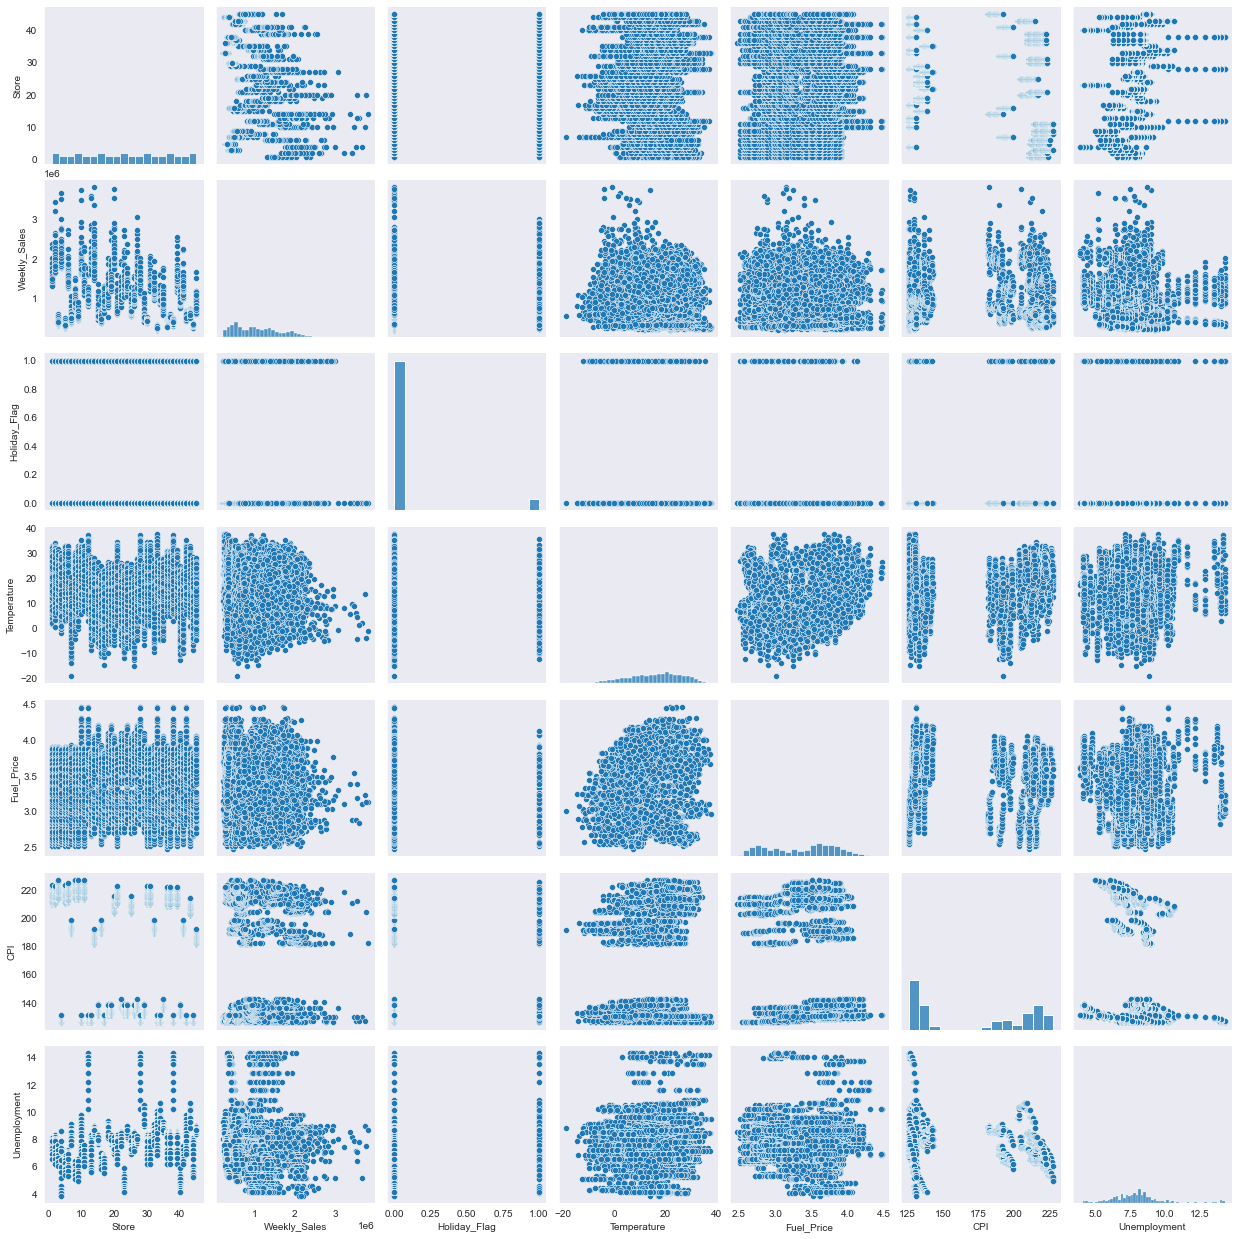

In [22]:
# Pairplot for reference

sns.pairplot(subset, palette='YlGnBu_r')
plt.show()